In [74]:
import numpy as np 
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

In [79]:
data = pd.read_csv("results.csv")  

data = data.set_index('date')
data.index = pd.to_datetime( data.index, format= '%Y.%m.%d')
data.index


start = datetime(day=1, month=1, year=2016)
end = datetime(day=13, month=7, year=2021)
data_from_2016 = data[start:end]


teams_in_euro2021 = ['Belgium','Denmark', 'Germany', 'England', 'France', 'Finland', 'Croatia', 'Italy', 'Netherlands', 'Austria', 'Portugal', 'Poland', 'Russia', 'Sweden', 'Switzerland', 'Scotland', 'Hungary', 'Turkey', 'Ukraine', 'Wales', 'North Macedonia', 'Spain', 'Slovakia', 'Czech Republic' ]

euro_21_teams = data_from_2016.loc[data_from_2016['home_team'].isin(teams_in_euro2021) & data_from_2016['away_team'].isin(teams_in_euro2021)] 

df_team_score = pd.DataFrame()

df_team_score = euro_21_teams[['home_team', 'away_team', 'home_score', 'away_score']]

df_team_score = df_team_score.groupby(['home_team']).sum()
df_team_score.head(30)



,home_score,away_score
home_team,,
Austria,11,16
Belgium,25,13
Croatia,24,16
Czech Republic,14,15
Denmark,12,4
England,32,19
Finland,6,8
France,49,22
Germany,45,28


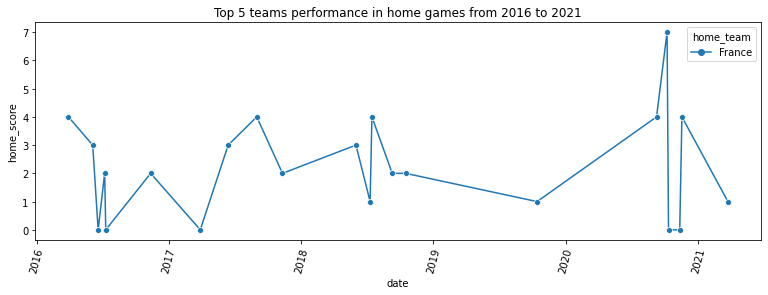

Team: France
Gradient: 24.5


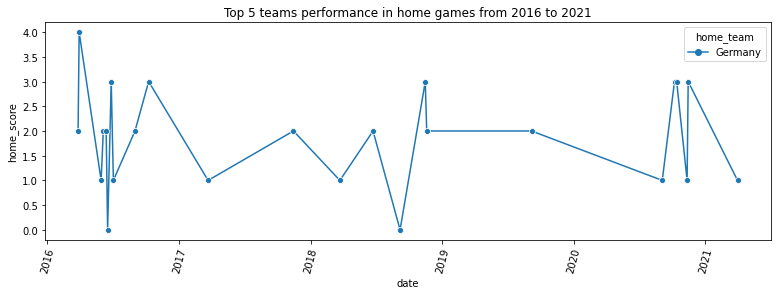

Team: Germany
Gradient: 22.5


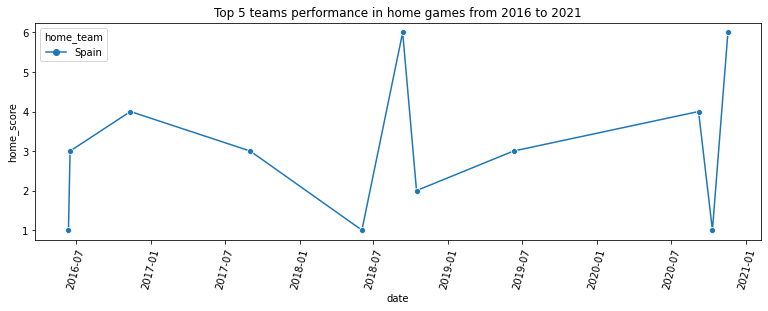

Team: Spain
Gradient: 17.0


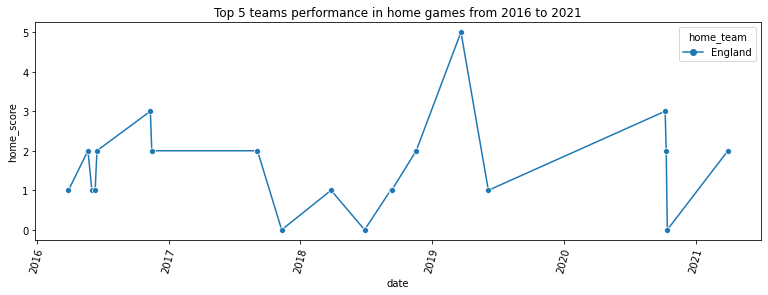

Team: England
Gradient: 16.0


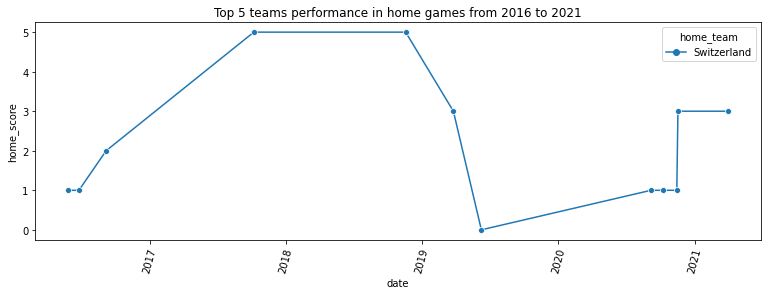

Team: Switzerland
Gradient: 13.0


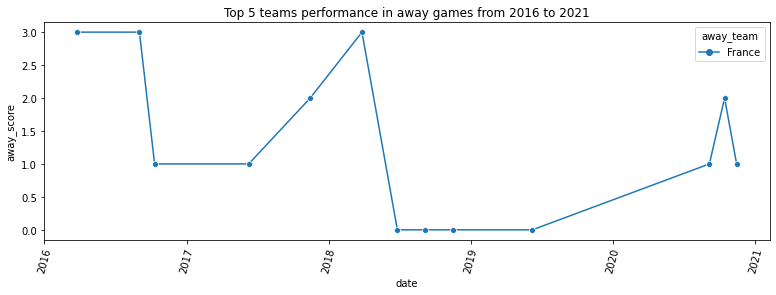

Team: France
Gradient: 8.5


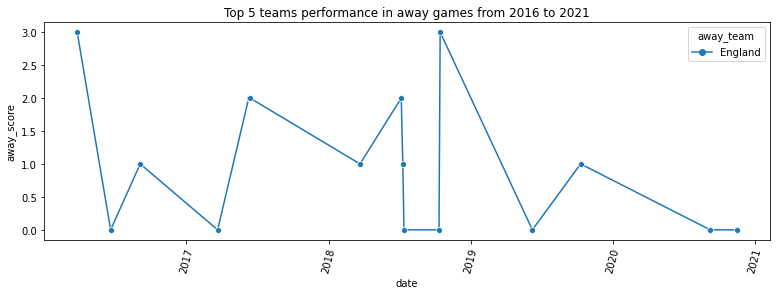

Team: England
Gradient: 8.0


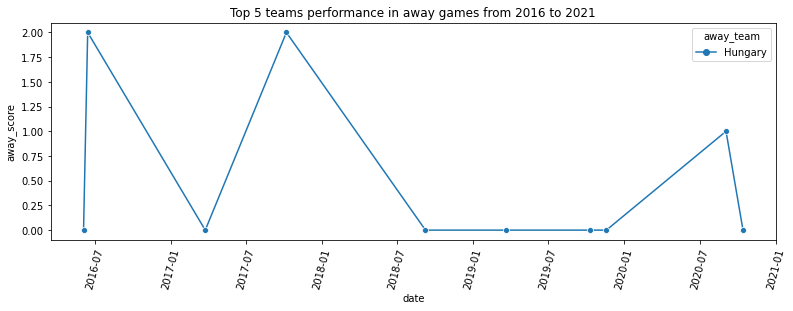

Team: Hungary
Gradient: 2.5


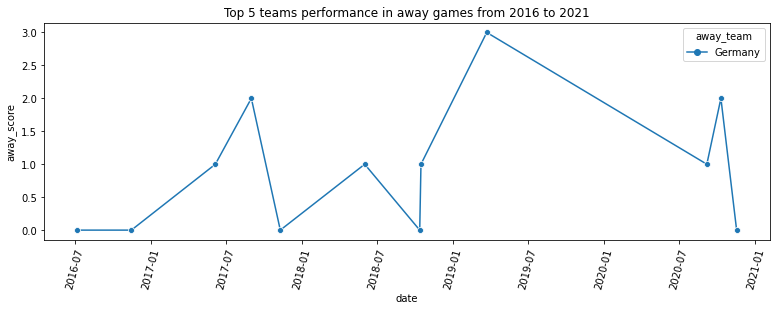

Team: Germany
Gradient: 5.5


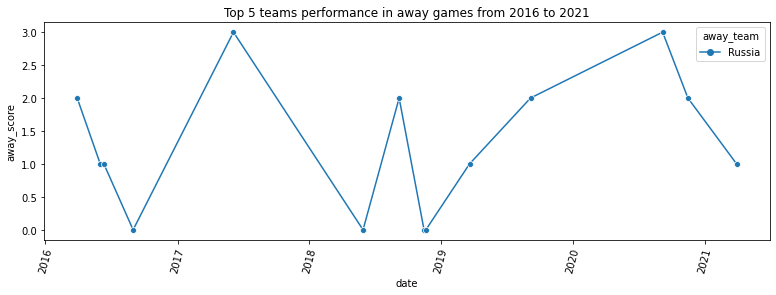

Team: Russia
Gradient: 9.0


In [81]:

#top score in home games:France,Germany,Spain,England,Switzerland
#top score in away games:Germany,Russia,Hungary,France,England

    
teams_homeMax = ['France', 'Germany', 'Spain', 'England', 'Switzerland']

# figure size in inches
rcParams['figure.figsize'] = 13,4

for team in teams_homeMax:
    
    df_team = euro_21_teams[euro_21_teams['home_team'].str.contains(team,case=True)]
    GradientScore = (df_team['home_score'].sum()) / 2
    sns.lineplot(data=df_team, x="date", y="home_score", hue='home_team', style='home_team',  markers=True, dashes=False)
    plt.xticks(rotation=75)
    plt.title('Top 5 teams performance in home games from 2016 to 2021')
    plt.show()
    print("Team: " + team)
    print("Gradient: " + GradientScore.astype('str'))
    
    teams_awayMax = ['France', 'England', 'Hungary', 'Germany','Russia']

# figure size in inches
rcParams['figure.figsize'] = 13,4

for team in teams_awayMax:
    
    df_team = euro_21_teams[euro_21_teams['away_team'].str.contains(team,case=True)]
    GradientScore = (df_team['away_score'].sum()) / 2
    sns.lineplot(data=df_team, x="date", y="away_score", hue='away_team', style='away_team',  markers=True, dashes=False)
    plt.xticks(rotation=75)
    plt.title('Top 5 teams performance in away games from 2016 to 2021')
    plt.show()
    print("Team: " + team)
    print("Gradient: " + GradientScore.astype('str'))